# The Boston Housing Price Dataset

In [1]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

## Preparing the Data - Normalization

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [8]:
test_data -= mean
test_data /= std

Note  that  the  quantities  used  for  normalizing  the  test  data  are  computed  using  the
training data. You should never use in your
 workflow any quantity computed on the
test data, even for something as
 simple as data normalization.

##  Building the network

In [9]:
from keras import models, layers

In [10]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'rmsprop', metrics = ['mae'], loss = 'mse')
    return model

### Validating the approach using K-fold validation

In [11]:
import numpy as np

In [12]:
k=4
num_val_samples = len(train_data)//4
num_epochs = 100
all_scores = []

In [15]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                        train_data[(i+1)*num_val_samples:]],
                        axis=0)
    partial_train_targets = np.concatenate(
                        [train_targets[:i*num_val_samples],
                        train_targets[(i+1)*num_val_samples:]],
                        axis=0)
    
    model = build_model()
    
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,
             batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
all_scores

[2.120194893072147, 2.175400748111234, 2.9985576030051355, 2.401473903419948]

In [17]:
np.mean(all_scores)

2.423906786902116

### For 500 Epcohs

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                        train_data[(i+1)*num_val_samples:]],
                        axis=0)
    partial_train_targets = np.concatenate(
                        [train_targets[:i*num_val_samples],
                        train_targets[(i+1)*num_val_samples:]],
                        axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,
             batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### Building the history of successive mean K-fold validation scores

In [19]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

### Plotting Validation Scores

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Validation MAE')

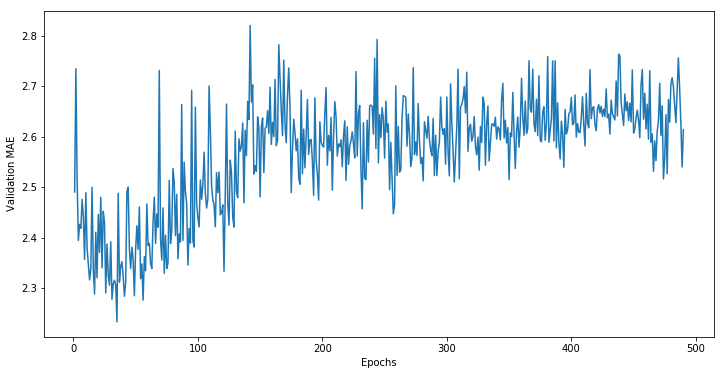

In [38]:
plt.figure(figsize=(12,6))
plt.plot(range(1, len(average_mae_history[10:])+1), average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

According  to  this  plot,  validation MAE stops  improving  significantly  after  80  epochs.
Past that point, you start overfitting.

## Training the final model

In [39]:
model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 908us/step


In [40]:
test_mae_score

2.6759515743629607

In [41]:
test_mse_score

18.08681562835095